<a href="https://colab.research.google.com/github/jobsiggang/2026_AI_Datascience/blob/main/2026kerisdata1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 라이브러리 불러오기

In [4]:
!pip install koreanize-matplotlib -q

In [3]:
# 데이터 분석을 위한 라이브러리 불러오기
import koreanize_matplotlib      # 그래프의 한글처리
import pandas as pd              # 데이터프레임 처리
import matplotlib.pyplot as plt  # 기본 시각화
import seaborn as sns            # 통계 기반 시각화

#2. 데이터의 생성

In [47]:
import pandas as pd
import numpy as np

df_hour = pd.DataFrame({
    '학번': [101,102,103,104,105,106,107,108,109,110,111,112,113,114,115],
    '성별': ['남','여','남','여','남','여','남','여','남','여','남','여','남','여','남'],
    '공부시간': [2.2,0.8,2.1,2.7,3.0,3.6,4.1,4.8,5.2,5.9,6.3,3.0,2.4,8.1,8.9],
    '점수': [59.2,45.0,62.8,68.3,50.0,75.2,0.0,82.2,85.6,64.5,90.2,89.2,49.6,77.7,100.0]
})

df_place = pd.DataFrame({
    '학생ID': [101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117],
    '장소': ['카페','집','독서실','카페',np.nan,'카페','집','독서실','독서실','집','독서실','독서실','집','독서실','독서실','카페','집']
})

#3. pandas 데이터 다루기

In [49]:
# 상위 5개 데이터 확인해 보자
df_hour.head()

,학번,성별,공부시간,점수
0,101,남,2.2,59.2
1,102,여,0.8,45.0
2,103,남,2.1,62.8
3,104,여,2.7,68.3
4,105,남,3.0,50.0


In [50]:
##데이터의 개수와 데이터 타입을 확인해 보자
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학번      15 non-null     int64  
 1   성별      15 non-null     object 
 2   공부시간    15 non-null     float64
 3   점수      15 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 612.0+ bytes


In [51]:
# 상위 5개 데이터 확인해보자
df_place.head()

,학생ID,장소
0,101,카페
1,102,집
2,103,독서실
3,104,카페
4,105,NaN


In [52]:
#데이터의 개수와 데이터 타입을 확인해 보자
df_place.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   학생ID    17 non-null     int64 
 1   장소      16 non-null     object
dtypes: int64(1), object(1)
memory usage: 404.0+ bytes


In [53]:
# 두 데이터 프레임을 병합하기 위해 키 컬럼명을 통일하고 컬럼명을 확인해 보자.
# 학생ID 컬럼을 학번으로 변경
df_place = df_place.rename(columns={'학생ID': '학번'})
df_place.columns

Index(['학번', '장소'], dtype='object')

In [54]:
# 두 데이터프레임을 병합해보자
# 공통 컬럼 '학번'을 기준으로 병합
df_score = pd.merge(df_hour, df_place, on="학번", how="inner")
df_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학번      15 non-null     int64  
 1   성별      15 non-null     object 
 2   공부시간    15 non-null     float64
 3   점수      15 non-null     float64
 4   장소      14 non-null     object 
dtypes: float64(2), int64(1), object(2)
memory usage: 732.0+ bytes


In [55]:
# 데이터 프레임의 일부 확인
df_score.head()

,학번,성별,공부시간,점수,장소
0,101,남,2.2,59.2,카페
1,102,여,0.8,45.0,집
2,103,남,2.1,62.8,독서실
3,104,여,2.7,68.3,카페
4,105,남,3.0,50.0,NaN


In [56]:
# 학생 활동 : 컬럼 이름을 확인해보자
df_score.columns

Index(['학번', '성별', '공부시간', '점수', '장소'], dtype='object')

In [57]:
#  데이터프레임의 전체 정보를 확인해보자
# 각 컬럼의 데이터 타입, 결측치 개수, 데이터 개수를 한 번에 확인
df_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학번      15 non-null     int64  
 1   성별      15 non-null     object 
 2   공부시간    15 non-null     float64
 3   점수      15 non-null     float64
 4   장소      14 non-null     object 
dtypes: float64(2), int64(1), object(2)
memory usage: 732.0+ bytes


In [58]:
# 수치형 데이터의 기본 통계를 확인해보자
# 평균, 표준편차, 최소·최대값을 확인
df_score.describe()

,학번,공부시간,점수
count,15.000000,15.000000,15.000000
mean,108.000000,4.206667,66.633333
std,4.472136,2.309442,24.680781
min,101.000000,0.800000,0.000000
25%,104.500000,2.550000,54.600000
50%,108.000000,3.600000,68.300000
75%,111.500000,5.550000,83.900000
max,115.000000,8.900000,100.000000


In [59]:
# 점수 컬럼을 시리즈로 추출해보자
score_series = df_score["점수"] #1차원에 유의
score_series

,점수
0,59.2
1,45.0
2,62.8
3,68.3
4,50.0
5,75.2
6,0.0
7,82.2
8,85.6
9,64.5


In [60]:
# 점수의 평균을 구해 보자.
df_score["점수"].mean()

np.float64(66.63333333333335)

In [61]:
# 점수의 최댓값을 구해보자.
df_score["점수"].max()

100.0

In [62]:
# 점수가 0점인 학생을 찾아보자
df_score[df_score['점수'] == 0]

,학번,성별,공부시간,점수,장소
6,107,남,4.1,0.0,집


In [63]:
# 점수의 상위 25%(하위75%) 기준값을 확인해보자
# quantile(0.75)는 점수 분포에서 75퍼센트 지점을 의미함
df_score["점수"].quantile(0.75)

np.float64(83.9)

In [64]:
#상위 25%에 해당하는 학생들을 찾아보자
upper_q = df_score["점수"].quantile(0.75)
print(upper_q)
df_score[df_score["점수"] >= upper_q]

83.9


,학번,성별,공부시간,점수,장소
8,109,남,5.2,85.6,독서실
10,111,남,6.3,90.2,독서실
11,112,여,3.0,89.2,독서실
14,115,남,8.9,100.0,독서실


In [65]:
# 장소별 학생 수를 확인해보자
df_score['장소'].value_counts()

,count
장소,
독서실,7
집,4
카페,3


In [67]:
# 공부시간이 1.0이하는 1시간으로 변경해보자.
df_score.loc[df_score["공부시간"] <1.0, "공부시간"] =1.0
df_score.describe()

,학번,공부시간,점수
count,15.000000,15.000000,15.000000
mean,108.000000,4.220000,66.633333
std,4.472136,2.288855,24.680781
min,101.000000,1.000000,0.000000
25%,104.500000,2.550000,54.600000
50%,108.000000,3.600000,68.300000
75%,111.500000,5.550000,83.900000
max,115.000000,8.900000,100.000000


In [66]:
# NaN으로 비어 있는 값을 "독서실"로 변경해보자.
df_score["장소"] = df_score["장소"].fillna("독서실")
df_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학번      15 non-null     int64  
 1   성별      15 non-null     object 
 2   공부시간    15 non-null     float64
 3   점수      15 non-null     float64
 4   장소      15 non-null     object 
dtypes: float64(2), int64(1), object(2)
memory usage: 732.0+ bytes


In [68]:
# 성별에 따른 평균 점수를 계산해보자
# 범주형 데이터를 그룹으로 묶어 분석
df_score.groupby('성별')['점수'].mean()

,점수
성별,
남,62.175000
여,71.728571


In [275]:
# 공부 장소에 따른 평균 점수를 계산해보자
df_score.groupby('장소')['점수'].mean()

,점수
장소,
독서실,79.712500
집,39.775000
카페,67.566667


In [69]:
# 합격 여부 컬럼을 만들어보자
# 분류 문제를 위한 종속변수 생성
df_score['합격여부'] = df_score['점수'] >= 60
df_score.head()

,학번,성별,공부시간,점수,장소,합격여부
0,101,남,2.2,59.2,카페,False
1,102,여,1.0,45.0,집,False
2,103,남,2.1,62.8,독서실,True
3,104,여,2.7,68.3,카페,True
4,105,남,3.0,50.0,독서실,False


In [70]:
#합격여부 데이터 형을 확인해보자.( boolean)
df_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학번      15 non-null     int64  
 1   성별      15 non-null     object 
 2   공부시간    15 non-null     float64
 3   점수      15 non-null     float64
 4   장소      15 non-null     object 
 5   합격여부    15 non-null     bool   
dtypes: bool(1), float64(2), int64(1), object(2)
memory usage: 747.0+ bytes


In [278]:
# 속성들 간의 상관관계를 확인해보자
df_score.corr(numeric_only="True")

,학번,공부시간,점수,합격여부
학번,1.000000,0.742160,0.442773,0.392792
공부시간,0.742160,1.000000,0.485107,0.519506
점수,0.442773,0.485107,1.000000,0.767291
합격여부,0.392792,0.519506,0.767291,1.000000


# 4. 데이터 시각화 실습

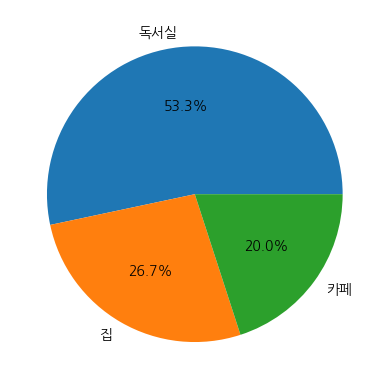

In [72]:
# 가장 많은 학생이 선택한 공부장소는 어디인가?
# 데이터 분석을 위한 라이브러리 불러오기

# 장소별 학생 수 계산
place_count = df_score["장소"].value_counts()
plt.pie(
    place_count.values,           # 각 장소별 학생 수
    labels=place_count.index,     # 장소 이름
    autopct="%.1f%%"              # 비율을 퍼센트로 표시
)
plt.show()

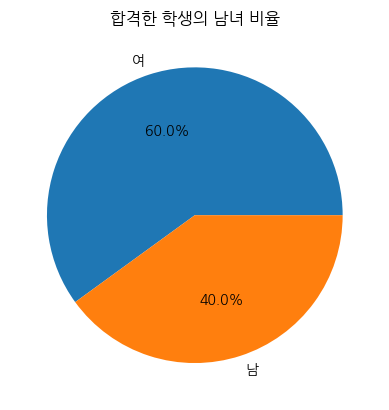

In [73]:
# [심화] 합격한 학생의 남녀 비율은 어떻게 되는 지 확인해보자.

# 합격한 학생만 필터링
pass_students = df_score[df_score["합격여부"] == True] # 합격여부가

# 성별별 학생 수 계산
gender_count = pass_students["성별"].value_counts()

# 파이차트로 시각화
plt.pie(
    gender_count.values,        # 성별별 합격자 수
    labels=gender_count.index,  # 성별
    autopct="%.1f%%"            # 비율 표시
)

plt.title("합격한 학생의 남녀 비율")
plt.show()

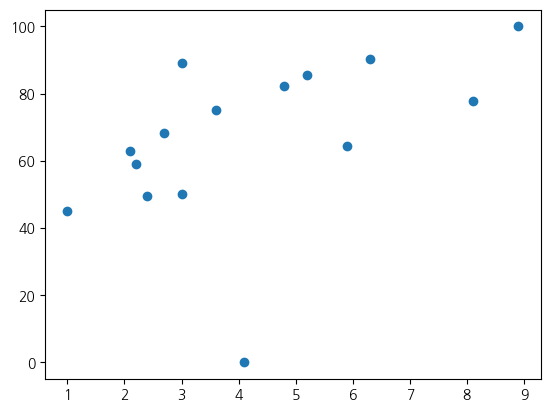

In [74]:
#공부시간이 증가할수록 점수는 전반적으로 어떤 경향을 보이는가?
plt.scatter(df_score["공부시간"], df_score["점수"])
plt.show()

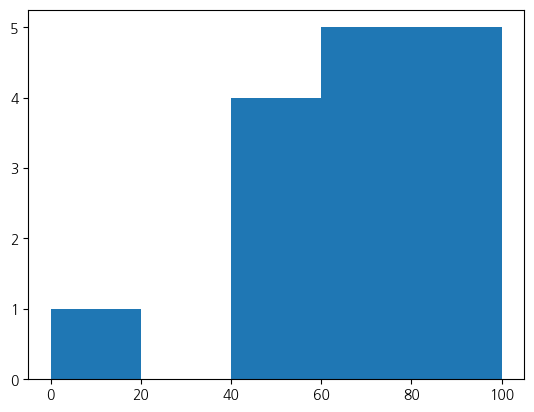

In [75]:
# 점수는 어느 구간에 가장 많이 분포해 있는가?
plt.hist(df_score["점수"], bins=5)
plt.show()

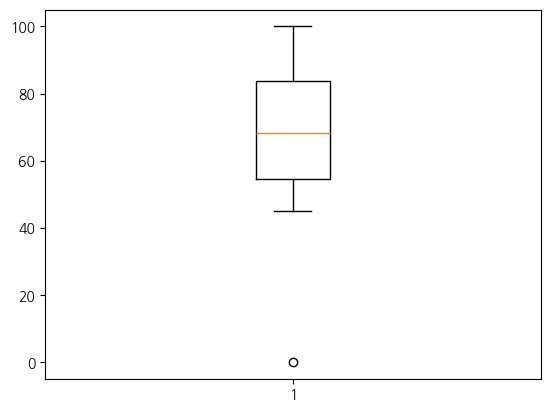

In [ ]:
#점수의 분포를 박스플롯으로 확인해 보자.
plt.boxplot(df_score[["점수"]])
plt.show()

In [ ]:
# [심화] 정상범위 밖을 벗어난 값을 찾아보자
#  1사분위수(Q1)와 3사분위수(Q3) 계산
Q1 = df_score["점수"].quantile(0.25)
Q3 = df_score["점수"].quantile(0.75)

# 사분위 범위(IQR) 계산
IQR = Q3 - Q1

# 이상치 추출
outliers = df_score[
    (df_score["점수"] < Q1 - 1.5 * IQR) |
    (df_score["점수"] > Q3 + 1.5 * IQR)
]

# 이상치 데이터 확인
outliers[["학번", "점수"]]


,학번,점수
6,107,0.0


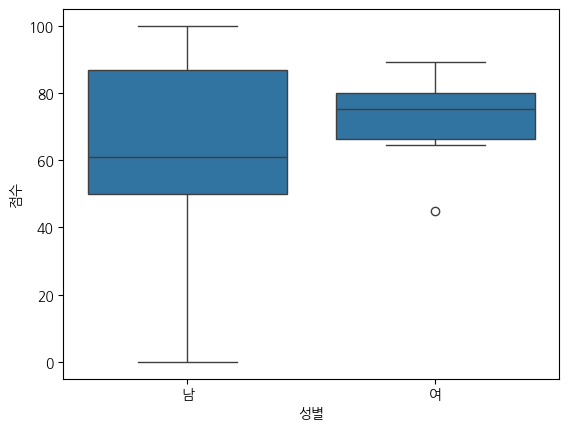

In [76]:
# 성별에 따라 점수 분포의 중앙값은 어떻게 다른가?
import seaborn as sns
sns.boxplot(x="성별", y="점수", data=df_score)
plt.show()

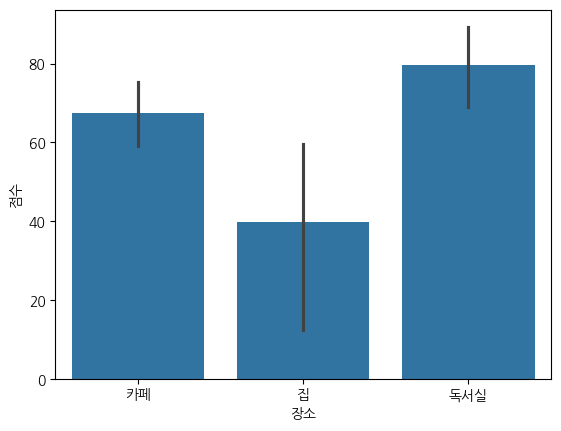

In [ ]:
# 점수의 평균이 가장 높은 공부장소는 어디인가?
sns.barplot(x="장소", y="점수", data=df_score)
plt.show()

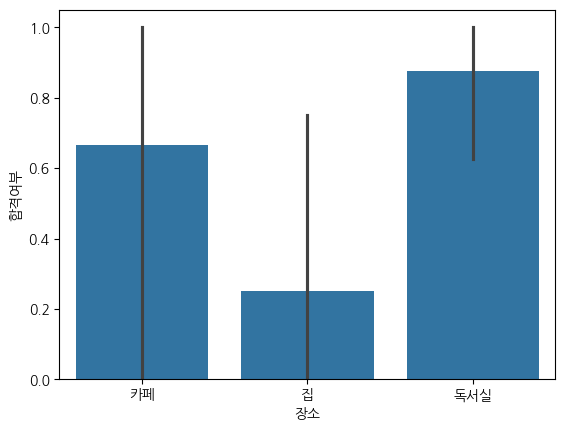

In [77]:
# 학생 활동 : 공부 장소에 따라 합격 학생 비율이 다른지 확인해보자.
sns.barplot(x="장소", y="합격여부", data=df_score)
plt.show()

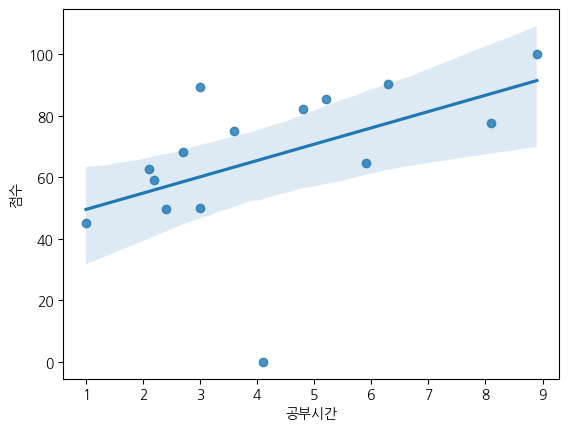

In [78]:
# 산점도와 추세선으로 공부시간과 점수의 관계를 파악하자.
sns.regplot(x="공부시간", y="점수", data=df_score)
plt.show()
# 연한 파란색은 회귀선의 신뢰구간으로 추세선이 실제 데이터에서 어느 범위까지 변동할 수 있는지를 나타내며, 영역이 넓을수록 예측의 불확실성이 크고 좁을수록 관계가 비교적 안정적임을 의미

# seaborn으로 속성간의 관계파악

In [90]:
# 붗꽃 데이터 불러오기
import seaborn as sns
df_iris = sns.load_dataset("iris")
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


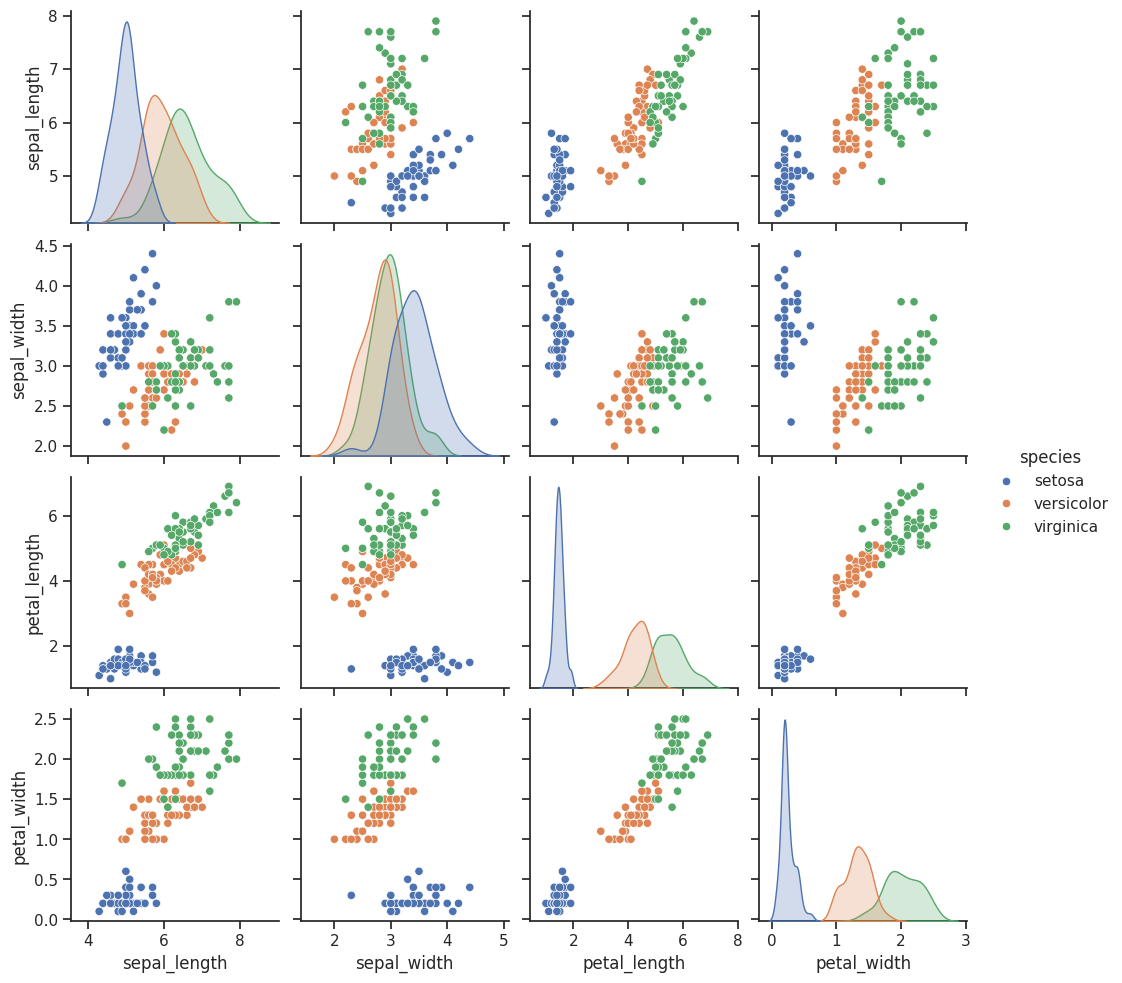

In [97]:
#  붓꽃의 속성들이 서로 어떤 관계인지, 품종별로 색깔을 달리해서 시각화 해보자.

sns.pairplot(df_iris, hue="species")

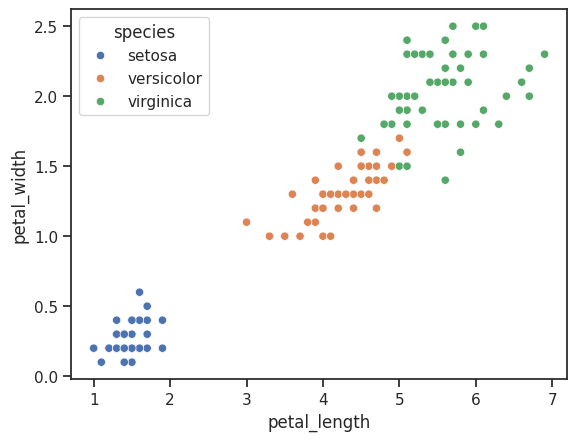

In [101]:
#꽃잎의 길이와 너비를 산점도 그려보자
sns.scatterplot(df_iris, x='petal_length',y= 'petal_width', hue="species")
plt.show()

<Axes: >

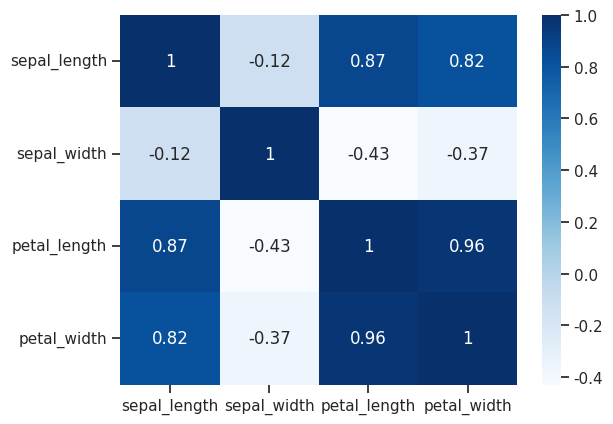

In [92]:
# 붓꽃의 속성들이 서로 어떤 상관관계인지, 관계의 강도에 따라 색의 진하기를 달리해서 시각화 해보자
sns.heatmap(df_iris.corr(numeric_only="True"), annot=True, cmap="Blues")

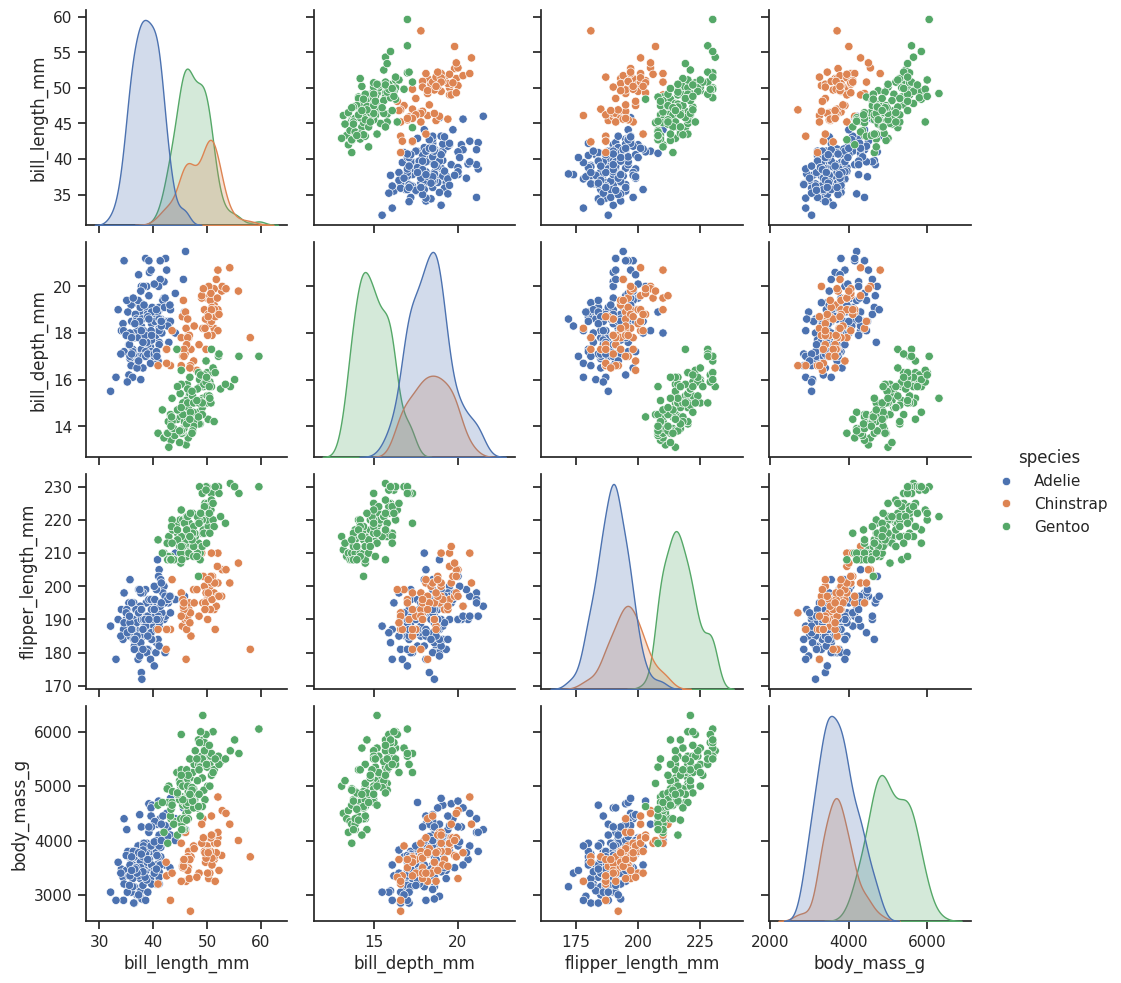

In [88]:
#  펭귄 데이터의 속성들이 서로 어떤 관계인지, 품종별로 색깔을 달리해서 시각화 해보자.
sns.set_theme(style="ticks")

df_penguins = sns.load_dataset("penguins")
sns.pairplot(df_penguins, hue="species")